# Business Cycle of Ecuador 


In [2]:
#import packages to be used
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
%matplotlib inline
from scipy.signal import find_peaks

### Load the data
The data loaded is a stata file

In [3]:
df = pd.read_stata(r'C:\Users\P2038\Downloads\pwt1001.dta')
df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Subset the data for the country of interest

In [4]:
Ecuador = df[df.countrycode == 'ECU']
Ecuador.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
3640,ECU,Ecuador,US Dollar,1950,11334.056641,11583.661133,3.443379,1.089324,NaN,1.502682,...,0.078895,-0.048974,0.015302,0.064543,0.029566,0.029991,0.058693,0.056729,0.022540,NaN
3641,ECU,Ecuador,US Dollar,1951,11719.223633,11989.242188,3.533860,1.110024,NaN,1.515231,...,0.067146,-0.064328,-0.017025,0.068485,0.028799,0.031076,0.058652,0.052613,0.022921,NaN
3642,ECU,Ecuador,US Dollar,1952,12821.001953,13107.490234,3.626507,1.130982,NaN,1.527885,...,0.081692,-0.056458,0.010474,0.069633,0.028045,0.031338,0.060943,0.056071,0.022566,NaN
3643,ECU,Ecuador,US Dollar,1953,13585.734375,13902.870117,3.722401,1.152335,NaN,1.540644,...,0.071925,-0.060467,-0.013426,0.071130,0.031185,0.031728,0.065544,0.061751,0.025014,NaN
3644,ECU,Ecuador,US Dollar,1954,15104.598633,15459.231445,3.822206,1.174092,NaN,1.553510,...,0.079405,-0.068943,-0.025578,0.072994,0.030930,0.032492,0.067141,0.064836,0.024736,0.811291


In [5]:
Ecuador.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

### Select the variables of interest
To construct the analysis of the business cycle of Ecuador, we will need to select our variables of interest

In [19]:
ecu = Ecuador.loc[:,['year','rgdpna','emp','rnna', 'csh_x', 'csh_m'] ]
ecu.head()

,year,rgdpna,emp,rnna,csh_x,csh_m
3640,1950,12997.127930,1.089324,66823.617188,0.078895,-0.048974
3641,1951,13260.216797,1.110024,71423.890625,0.067146,-0.064328
3642,1952,14794.551758,1.130982,74973.710938,0.081692,-0.056458
3643,1953,15308.101562,1.152335,80488.437500,0.071925,-0.060467
3644,1954,16760.353516,1.174092,88015.921875,0.079405,-0.068943


### Cleaning data
Changing year as a column indexnand datetimetype so we can build time series graphs

In [20]:
#change year to datetime
ecu['year'] = pd.to_datetime(ecu['year'], format='%Y')

#set year column as index
ecu.set_index('year', inplace = True)
ecu.head()

,rgdpna,emp,rnna,csh_x,csh_m
year,,,,,
1950-01-01,12997.127930,1.089324,66823.617188,0.078895,-0.048974
1951-01-01,13260.216797,1.110024,71423.890625,0.067146,-0.064328
1952-01-01,14794.551758,1.130982,74973.710938,0.081692,-0.056458
1953-01-01,15308.101562,1.152335,80488.437500,0.071925,-0.060467
1954-01-01,16760.353516,1.174092,88015.921875,0.079405,-0.068943


In [21]:
#rename column labels
ecu.rename(columns={'rgdpna':'realgdp', 'emp':'labor', 'rnna':'capital', 'rtfpna': 'TFP', 'csh_x':'exports', 'csh_m':'imports'}, inplace = True)
ecu.head()

,realgdp,labor,capital,exports,imports
year,,,,,
1950-01-01,12997.127930,1.089324,66823.617188,0.078895,-0.048974
1951-01-01,13260.216797,1.110024,71423.890625,0.067146,-0.064328
1952-01-01,14794.551758,1.130982,74973.710938,0.081692,-0.056458
1953-01-01,15308.101562,1.152335,80488.437500,0.071925,-0.060467
1954-01-01,16760.353516,1.174092,88015.921875,0.079405,-0.068943


### Calculate Net Exports

Net Exports = Exports - Imports

In [22]:
ecu['net exports'] = ecu['exports'] - ecu['imports'].abs()
ecu.head()

,realgdp,labor,capital,exports,imports,net exports
year,,,,,,
1950-01-01,12997.127930,1.089324,66823.617188,0.078895,-0.048974,0.029921
1951-01-01,13260.216797,1.110024,71423.890625,0.067146,-0.064328,0.002818
1952-01-01,14794.551758,1.130982,74973.710938,0.081692,-0.056458,0.025234
1953-01-01,15308.101562,1.152335,80488.437500,0.071925,-0.060467,0.011458
1954-01-01,16760.353516,1.174092,88015.921875,0.079405,-0.068943,0.010462


In [23]:
#drop exports and imports columns
ecu_growth = ecu.drop(columns=['exports', 'imports'])
ecu_growth.head()

,realgdp,labor,capital,net exports
year,,,,
1950-01-01,12997.127930,1.089324,66823.617188,0.029921
1951-01-01,13260.216797,1.110024,71423.890625,0.002818
1952-01-01,14794.551758,1.130982,74973.710938,0.025234
1953-01-01,15308.101562,1.152335,80488.437500,0.011458
1954-01-01,16760.353516,1.174092,88015.921875,0.010462


## Descriptive Statistics

In [25]:
descriptive = ecu_growth.describe()
descriptive.loc[['count', 'mean', 'min', 'max', 'std'],:]

,realgdp,labor,capital,net exports
count,70.000000,70.000000,7.000000e+01,70.000000
mean,80690.828125,3.482998,4.277145e+05,0.008434
min,12997.127930,1.089324,6.682362e+04,-0.042065
max,194146.828125,8.246671,1.077958e+06,0.074770
std,55441.601562,2.230159,2.696246e+05,0.026389


In [26]:
#Correlation among variables
ecu_growth.corr()

,realgdp,labor,capital,net exports
realgdp,1.000000,0.991798,0.992681,-0.023068
labor,0.991798,1.000000,0.977343,-0.075595
capital,0.992681,0.977343,1.000000,-0.000652
net exports,-0.023068,-0.075595,-0.000652,1.000000


### Graphing the Business Cycle

In [13]:
ecu_growth['GDP_growth'] = ecu_growth['realgdp'].pct_change(periods=4) * 100

In [14]:
peaks, _ = find_peaks(ecu_growth['GDP_growth'])
troughs, _ = find_peaks(-ecu_growth['GDP_growth'])

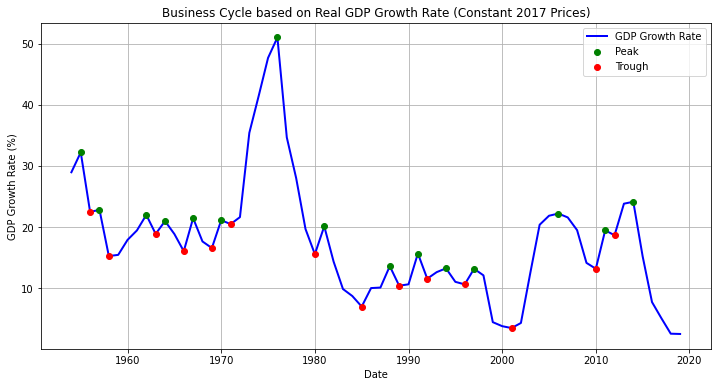

In [15]:
plt.figure(figsize=(12, 6))

# Plot the real GDP growth rate
plt.plot(ecu_growth.index, ecu_growth['GDP_growth'], label='GDP Growth Rate', color='blue', lw=2)

# Mark the peaks (expansionary phases) with green
plt.scatter(ecu_growth.index[peaks], ecu_growth['GDP_growth'].iloc[peaks], color='green', label='Peak', zorder=5)

# Mark the troughs (recessionary phases) with red
plt.scatter(ecu_growth.index[troughs], ecu_growth['GDP_growth'].iloc[troughs], color='red', label='Trough', zorder=5)

# Labels and title
plt.title('Business Cycle based on Real GDP Growth Rate (Constant 2017 Prices)')
plt.xlabel('Date')
plt.ylabel('GDP Growth Rate (%)')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.show()

In [17]:
# Step 1: Import the required libraries
from sklearn.linear_model import LinearRegression

# Step 2: Prepare data for linear regression
# We need to convert the date index into numerical values for the regression model
ecu_growth['Date_num'] = np.arange(len(ecu_growth))  # Convert dates to numerical indices

# Step 3: Fit the linear regression model
X = ecu_growth['Date_num'].values.reshape(-1, 1)  # Reshape for sklearn
y = ecu_growth['GDP_growth'].values

## Building the model
### Computing the per capita variables
1. Y/L = Gdp per worker
2. K/L = Capital per worker
3. L/L = labor per worker (equals 1)

Since Labor will be equal to one anyways we will not compute it

In [27]:
#add three columns with our computations from above
ecu_growth['gdp-worker']= ecu_growth['realgdp']/ecu_growth['labor']
ecu_growth['capita-labor']= ecu_growth['capital']/ecu_growth['labor']

ecu_growth

,realgdp,labor,capital,net exports,gdp-worker,capita-labor
year,,,,,,
1950-01-01,12997.127930,1.089324,6.682362e+04,0.029921,11931.371094,61344.121094
1951-01-01,13260.216797,1.110024,7.142389e+04,0.002818,11945.885742,64344.472656
1952-01-01,14794.551758,1.130982,7.497371e+04,0.025234,13081.159180,66290.828125
1953-01-01,15308.101562,1.152335,8.048844e+04,0.011458,13284.416016,69848.109375
1954-01-01,16760.353516,1.174092,8.801592e+04,0.010462,14275.164062,74965.109375
...,...,...,...,...,...,...
2015-01-01,189464.015625,7.665238,9.450032e+05,-0.024184,24717.304688,123284.257812
2016-01-01,187140.453125,7.754487,9.761224e+05,0.005727,24133.183594,125878.406250
2017-01-01,191572.671875,7.981274,1.010834e+06,-0.007762,24002.767578,126650.750000


## Visuals
### Scatterplot of Capital per worker vs GDP per capita

In [28]:
#create X and Y variables
gdp_perworker = ecu_growth[['gdp-worker']]

capital_perworker = ecu_growth[['capita-labor']]

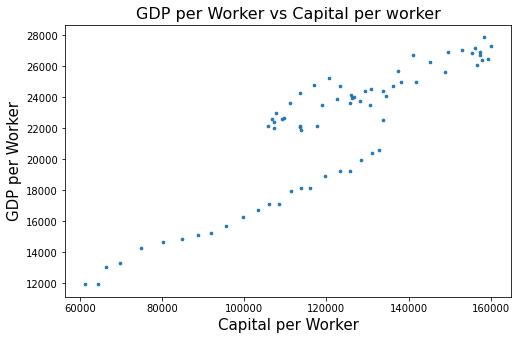

In [29]:
plt.subplots(figsize=(8, 5))
plt.scatter(capital_perworker, gdp_perworker, alpha=1, s=7)
plt.title("GDP per Worker vs Capital per worker", fontsize = 16)
plt.xlabel("Capital per Worker", fontsize = 15)
plt.ylabel("GDP per Worker", fontsize = 15)
plt.show()

### Line graph of GDP per capita over the years

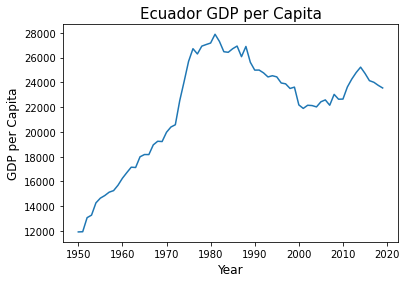

In [22]:
plt.plot(ecu.index, ecu_growth['gdp-capita'])
plt.title("Ecuador GDP per Capita", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP per Capita", fontsize=12)
plt.show()

### Line Graph of Real GDP

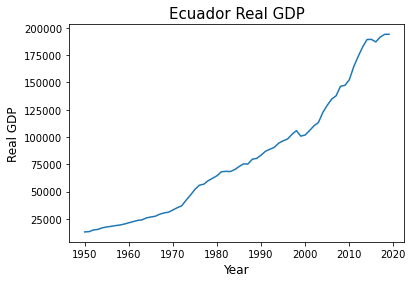

In [23]:
plt.plot(ecu_growth.index, ecu_growth['realgdp'])
plt.title("Ecuador Real GDP", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Real GDP", fontsize=12)
plt.show()

## Building the model - Linear Regression

### Log of the per capita variables
Applying the log will help the widespread of data compress and make it easier to understand and manage

In [42]:
#Taking the log gdp per capita, capital per worker and labor and adding them as new columns
ecu_growth['log-gdp'] = np.log(ecu_growth['gdp-capita'])
ecu_growth['log-capital'] = np.log(ecu_growth['capita-labor'])
ecu_growth['log-labor'] = np.log(ecu_growth['labor'])

In [38]:
#shift the net exports values to contrarest the negative values in the data and take the log as well
min_net_exports = ecu_growth['net exports'].min()
ecu_growth['net_exports_shifted'] = ecu_growth['net exports'] + abs(min_net_exports) + 1

In [39]:
# Now take the log of the shifted 'net_exports'
ecu_growth['log_net_exports'] = np.log(ecu_growth['net_exports_shifted'])

### Linear Regression
Using the calculated log variables we can now run a regression 
$$
log(y_t) = {\beta}_0 + {\beta}_1 log(capital) + {\beta}_2 log(labor) + {\beta}_3 log(net exports) + e_t
$$

In [55]:
#variable that contains the two independent variables K and L as a list so we can run the regression with two regressors
log_capital_labor_netexp = ecu_growth[['log-capital', 'log-labor', 'log_net_exports']]


#crated the dependent variable log GDP
log_gdp = ecu_growth['log-gdp']

In [56]:
#add the instercept(constant) to the model
log_capital_labor_netexp = sm.add_constant(log_capital_labor_netexp)

In [57]:
# create and fit the model
log_y = sm.OLS(log_gdp, log_capital_labor_netexp).fit()

In [58]:
print(log_y.summary())

                            OLS Regression Results                            
Dep. Variable:                log-gdp   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     577.5
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.77e-47
Time:                        00:52:12   Log-Likelihood:                 122.55
No. Observations:                  70   AIC:                            -237.1
Df Residuals:                      66   BIC:                            -228.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1674      0.293     

### Getting the residuals
The "residuals" is what we will use for our Solow residuals. So, using the regression equation we get:
$$
r_t = e_t
$$
$$
r_t = log(y_t) - {\beta}_0 - {\beta}_1 log(capital) - {\beta}_2 labor
$$

In [37]:
residuals = log_y.resid

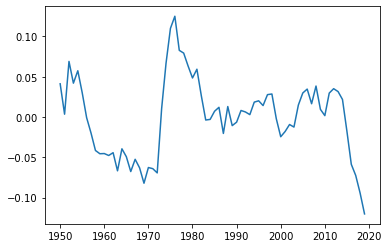

In [40]:
plt.plot(residuals)
plt.show()